## 모델 불러오기

In [469]:
## 라이브러리 설치
##pip install trimesh

In [470]:
import trimesh

In [471]:
model = trimesh.load('./obj/model.stl')

In [472]:
model.show()

In [473]:
## 모델 내 중복된 꼭지점 합치기
## trimesh에서는 필요없음
# model.merge_vertices()

In [474]:
## 변수에 저장
vertices = model.vertices

## 샘플 추출

https://trimesh.org/trimesh.sample.html

## 시각화

In [475]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [476]:
# plt.scatter(vertices[:,0], vertices[:,1])

In [477]:
# plt.scatter(vertices[:,0], vertices[:,2])

In [478]:
# plt.scatter(vertices[:,1], vertices[:,2])

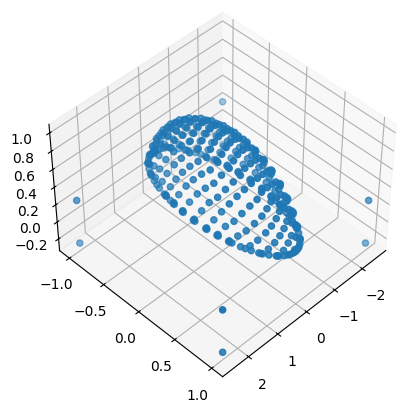

In [479]:
## 꼭지점 scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=45)
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])

In [480]:
##sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 200)
points = samples[0]
points

TrackedArray([[ 1.27979384, -1.        ,  0.1594139 ],
              [-2.17172886,  1.        , -0.11637546],
              [ 1.75245494, -0.10863537,  0.25      ],
              [ 0.89012407, -0.02666255,  0.44585955],
              [-1.4627586 , -1.        ,  0.01973684],
              [-1.11560276, -0.83388741,  0.25      ],
              [-1.65212165, -0.50853091, -0.25      ],
              [ 0.91752421, -0.70271315, -0.25      ],
              [-1.15327008,  0.49897445,  0.25      ],
              [ 2.46316244,  0.61051752,  0.25      ],
              [-0.22368823, -0.43113618,  0.8703355 ],
              [ 0.13513655,  0.88632316, -0.25      ],
              [-2.33212702,  0.01089294,  0.25      ],
              [-0.75574803, -0.43080961,  0.48842043],
              [-1.68092803, -0.23114701, -0.25      ],
              [-0.39720256, -0.89789361,  0.25      ],
              [-0.52023625, -1.        ,  0.01691434],
              [ 0.81297699,  0.41756811, -0.25      ],
          

In [481]:
## 거리상관 없이 임의의 점을 샘플링 할 때,

# import random
# import pandas as pd
# 
# sample_rand = trimesh.sample.sample_surface_even(model, 1000)
# points_rand = list(sample_rand[0])
# points_res = random.sample(points_rand, 100)
# 
# df_test = pd.DataFrame(points_res)
# df_test.to_csv('../3D/data/test.csv', index=False)

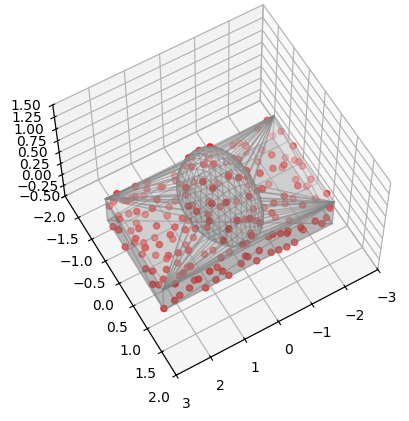

In [482]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## 점들 표시
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red')
## mesh 표현
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha= 0.3, edgecolor='gray')

## 보이는 각도 조정
ax.view_init(elev=60, azim=60)

## 축 크기 조정
plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

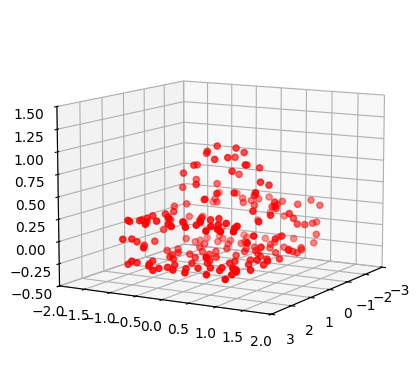

In [483]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha=0.5, edgecolor='gray', zorder=1)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', zorder=1)

ax.view_init(elev=10, azim=30)

plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

## 확률 밀도 함수 추정
### scipy 내 parzen method는 1차원 윈도우만 생성
https://sebastianraschka.com/Articles/2014_kernel_density_est.html

## 데이터 CSV로 저장

In [484]:
import pandas as pd

In [485]:
df = pd.DataFrame(points)

In [486]:
df

,0,1,2
0,1.279794,-1.000000,0.159414
1,-2.171729,1.000000,-0.116375
2,1.752455,-0.108635,0.250000
3,0.890124,-0.026663,0.445860
4,-1.462759,-1.000000,0.019737
...,...,...,...
195,0.832547,0.182581,0.519400
196,-2.477626,-0.549844,-0.250000
197,-0.841706,0.296479,-0.250000
198,-1.488332,0.473520,0.250000


In [487]:
df.to_csv("../3D/data/points.csv", index=False)

## 데이터 호출

In [488]:
## 불러온 값은 함수값이 아님!! 밀도값임!
## 밀도값 -> 함수값으로 변환 필요
dens = pd.read_csv("../3D/data/density.csv")
# dens
# type(dens)

In [489]:
total = dens.sum().sum()

In [490]:
pdf = dens/total
# pdf
# type(pdf)
pdf.sum().sum()

0.9999999999999999

 H[X] = –∫S p(x) log p(x)dx = –E{log p(X)}
 
When we have a sufficient number of points sampled from p, we can approximate
the expectation by the sample mean [8], which gives  H[X] = -(1/N) sigma log p(x). 


![01](./obj/img01.png)
    
![02](./obj/img02.png)


In [491]:
enp = np.log2(pdf).sum().sum()
enp

-19433861.317082167

https://github.com/cran/misc3d/blob/master/R/kde3d.R

## 점들의 위치 재조정하기

### 표면 위의 점인지 확인

### 점 위치 조정 > 표면 위 점인지 확인하는 작업 필요할 듯


표면에서 tangent vector를 따라 이동하고,
gradient descent와 Euler method를 적용


In [492]:
len(points)

200

In [493]:
# from scipy.spatial import cKDTree
# 
# tree = cKDTree(points)
# d, index = tree.query(points[0], k=2)
# d[1], index[1]

In [494]:
from scipy.spatial import cKDTree

# 점 집합 복사본
copyPoints = points.copy()

# 0본 인덱스를 시작으로 가까운 점 정렬
sort_neighbor = []
sort_neighbor.append(points[0])

# 정렬한 리스트로 들어간 점들은 삭제
copyPoints = np.delete(copyPoints, 0, axis=0)

while copyPoints.size > 0:
    # kdree 사용
    tree = cKDTree(copyPoints)
    d, index = tree.query(sort_neighbor[-1], k=1)
    
    # 가까운 점 추가
    sort_neighbor.append(copyPoints[index])
    
    # 정렬한 리스트로 들어간 점들은 삭제
    copyPoints = np.delete(copyPoints, index, axis=0)

# 정렬된 점들을 numpy 배열로 변환
sorted_points = np.array(sort_neighbor)

# 차분을 통해 탄젠트 벡터 계산
tangent_vectors = np.diff(sorted_points, axis=0)

# # 단위 벡터로 표준화 (길이가 1인 벡터)
# tangent_vectors_normalized = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

In [495]:
# sort_neighbor
tangent_vectors

array([[ 1.63349637e-01,  1.81149478e-01,  9.05861035e-02],
       [ 1.89814698e-01, -1.81149478e-01, -5.24942062e-02],
       [ 1.21880698e-01,  0.00000000e+00, -2.29969984e-01],
       [ 2.39252533e-01,  0.00000000e+00,  5.01238905e-02],
       [ 1.72598149e-01,  0.00000000e+00,  2.22581846e-01],
       [ 1.91670265e-01,  1.17208607e-01,  9.75845319e-03],
       [ 4.46901797e-02, -1.17208607e-01, -2.03124947e-01],
       [ 9.69499998e-02,  2.13866137e-01, -2.22099321e-01],
       [ 0.00000000e+00,  2.30146829e-01,  1.65339908e-01],
       [-2.85136262e-02,  2.57703981e-02,  2.59884360e-01],
       [-2.93456383e-01,  3.17666910e-01,  0.00000000e+00],
       [ 2.09517957e-01,  1.40999670e-01,  0.00000000e+00],
       [-8.63886014e-02,  2.33003635e-01,  0.00000000e+00],
       [-3.49011361e-01,  6.66524652e-02,  0.00000000e+00],
       [-4.37093766e-02,  2.57189180e-01,  0.00000000e+00],
       [-2.53786249e-01,  4.04400414e-02,  0.00000000e+00],
       [-2.57496247e-01,  4.86630675e-02

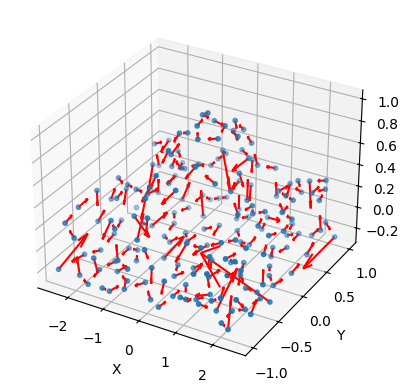

In [496]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, label="Points")

# 각 점에서 탄젠트 벡터 그리기
# for i in range(len(tangent_vectors_normalized)):
#     ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
#               tangent_vectors_normalized[i, 0], tangent_vectors_normalized[i, 1], tangent_vectors_normalized[i, 2],
#               length=0.1, color='r')
    
# 각 점에서 탄젠트 벡터 그리기
for i in range(len(tangent_vectors)):
    ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
              tangent_vectors[i, 0], tangent_vectors[i, 1], tangent_vectors[i, 2],
              length=0.5, color='r')

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
# ax.view_init(elev=30, azim=60)

# 플롯 보여주기
plt.show()

## 이동시키는 법
### 벡터에 스칼라값 곱해서
점 위치를 동일하게 떨어뜨리기 필요

In [497]:
## 점 이동 시키기
point_moved = sorted_points.copy()
point_moved[1:] = point_moved[1:] + 0.5 * tangent_vectors
point_moved

array([[ 1.27979384e+00, -1.00000000e+00,  1.59413897e-01],
       [ 1.52481830e+00, -7.28275784e-01,  2.95293052e-01],
       [ 1.72786552e+00, -1.09057474e+00,  1.71258691e-01],
       [ 1.81577922e+00, -1.00000000e+00, -1.47449181e-01],
       [ 2.11371767e+00, -1.00000000e+00,  4.27216460e-02],
       [ 2.25298863e+00, -1.00000000e+00,  3.51532470e-01],
       [ 2.45419495e+00, -8.24187090e-01,  2.54879227e-01],
       [ 2.42539509e+00, -1.05860430e+00, -5.46874206e-02],
       [ 2.54847500e+00, -6.79200794e-01, -2.86273929e-01],
       [ 2.50000000e+00, -4.40913619e-01,  7.27855939e-02],
       [ 2.45722956e+00, -5.17331436e-01,  3.79942180e-01],
       [ 2.03130180e+00, -5.37162706e-02,  2.50000000e-01],
       [ 2.49230693e+00, -1.05022050e-03,  2.50000000e-01],
       [ 2.25796505e+00,  2.77955397e-01,  2.50000000e-01],
       [ 1.77764231e+00,  2.61432277e-01,  2.50000000e-01],
       [ 1.88658392e+00,  6.13889815e-01,  2.50000000e-01],
       [ 1.52775924e+00,  5.45955287e-01

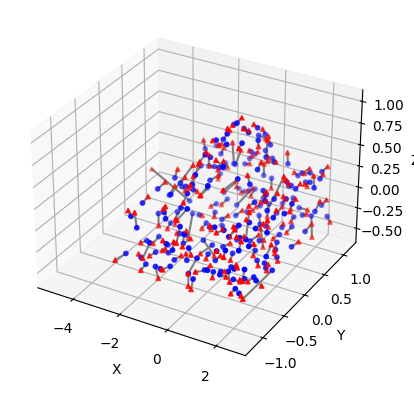

In [500]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(point_moved[:, 0], point_moved[:, 1], point_moved[:, 2], marker='^', s=10, color="red")
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, color="blue")

# 같은 인덱스끼리 선으로 연결
for i in range(len(points)):
    ax.plot([sorted_points[i, 0], point_moved[i, 0]], 
            [sorted_points[i, 1], point_moved[i, 1]], 
            [sorted_points[i, 2], point_moved[i, 2]], color="gray", linestyle="-")

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.view_init(elev=30, azim=60)

# 플롯 보여주기
plt.show()

점들의 법선벡터 구하고 법선벡터의 수직인 벡터 차분